In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas
import ezomero
from getpass import getpass

The ezomero API can be found here : https://thejacksonlaboratory.github.io/ezomero

You will need some information about your images/datatset : https://omero.epfl.ch/webclient/

# Connect to Omero server
Here we specify some information about the user and the omero server

In [2]:
user = "guiet"
groupID = "" #if left empty, the default group is used

before creating a connection

In [3]:
conn = ezomero.connect(user=user, 
                       password=getpass("OMERO Password: "), 
                       group=groupID,
                       host="omero-server.epfl.ch", 
                       port=4064, 
                       secure=True, 
                       config_path=None)

print(conn)

OMERO Password: ········


Don't forget to disconnect from Omero server using conn.close()

In [40]:
#conn.close()

# Retrieve images
Defining a dataset ID, we can list and retrieve images as Omero objects or numpy arrays.

In [4]:
dataset_ID = 283

In [5]:
imgID_list = ezomero.get_image_ids(conn,dataset=dataset_ID)
#print(imgID_list)

In [6]:
imgs_objects = np.ndarray(len(imgID_list), dtype=object) 
imgs_array = np.ndarray(len(imgID_list), dtype=object)
#print(imgs)
for idx , imgID in enumerate( imgID_list):
    print("Downloading image : "+str(imgID))
    imgs_objects[idx] , imgs_array[idx] = ezomero.get_image(conn, imgID)


In [7]:
image_of_interest = 10
z = 0
t = 0

## using the Omero image object

In [8]:
file_ann_ids = ezomero.get_file_annotation_ids(conn, 'Image', 59474)
print(file_ann_ids)

[3233]


In [9]:
map_ann_ids = ezomero.get_map_annotation_ids(conn, 'Image', 59474)
print(map_ann_ids)

[]


In [10]:
ezomero.get_file_annotation(conn,file_ann_ids[0], folder_path="data/")

'/opt/conda/lib/python3.8/site-packages/ezomero/Figure_2021-6-16_15-42-35.pdf'

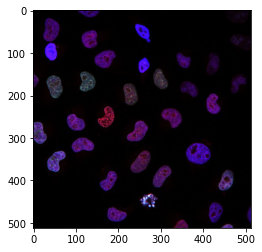

In [11]:
renderedImage = imgs_objects[image_of_interest].renderImage(z, t)
fig = plt.figure()
plt.imshow(renderedImage)

## using the image array

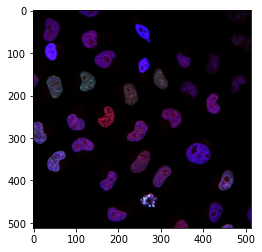

In [12]:
plt.imshow(imgs_array[image_of_interest][t,z,:,:,:])

In [13]:
import napari
from skimage.data import astronaut

# create the viewer on the Desktop and display the image
viewer = napari.view_image(imgs_array[image_of_interest][t,z,:,:,:], rgb=True)

# Upload an image on the omero-server

In [13]:
test_image = imgs_array[image_of_interest]
print(test_image.shape)
test_image=np.moveaxis(test_image , 0,-1)
print(test_image.shape)
test_image=np.moveaxis(test_image , 0,2)
print(test_image.shape)

(1, 1, 512, 512, 3)
(1, 512, 512, 3, 1)
(512, 512, 1, 3, 1)


In [14]:
output_datasetID =286

In [15]:
output_ID = ezomero.post_image(conn, test_image, "test", dataset_id=output_datasetID)

In [16]:
print(output_ID)

59787


# Don't forget to disconnect from Omero server

In [ ]:
conn.close()